In [7]:
import tensorflow as tf

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Downloading the MNIST data

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

Reshaping the array to 4-dims so that it can work with the Keras API

In [27]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Making sure that the values are float so that we can get decimal points after division

In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalizing the RGB codes by dividing it to the max RGB value.

In [29]:
x_train /= 255
x_test /= 255

In [30]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

('x_train shape:', (60000, 28, 28, 1))
('Number of images in x_train', 60000)
('Number of images in x_test', 10000)


Importing the required Keras modules containing model and layers

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Creating a Sequential Model and adding the layers

In [13]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Compiling and Fitting the Model

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.2041 - accuracy: 0.9390
Epoch 2/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0804 - accuracy: 0.9755
Epoch 3/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0565 - accuracy: 0.9823
Epoch 4/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0436 - accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0340 - accuracy: 0.9883
Epoch 6/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.0285 - accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0251 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.0189 - accuracy: 0.9935
Epoch 9/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0189 - accuracy: 0.9936
Epoch 10/10
60000/60000 [============

Evaluating the model 

In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 73us/step


[0.06786466063690637, 0.9854000210762024]

6


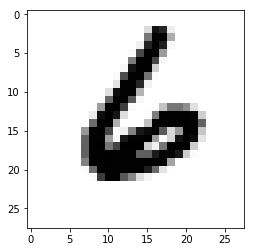

In [32]:
image_index = 8888
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28, 1))
print(pred.argmax())